# Introdução à Visão Computacional
Prof. Ricardo Petri Silva

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 1) Manipulação de espaços de cores

In [ ]:
# Bibliotecas Importantes
from PIL import Image
from numpy import *
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import imFerramentas as imF

Referências para as bibliotecas: 
- Image: https://pillow.readthedocs.io/en/stable/reference/Image.html
- Numpy: https://numpy.org/doc/stable/reference/index.html
- Pylab: https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm
- Matplotlib: https://matplotlib.org/stable/tutorials/introductory/images.html
- Imshow: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
- Skimage: https://scikit-image.org/docs/stable/api/api.html


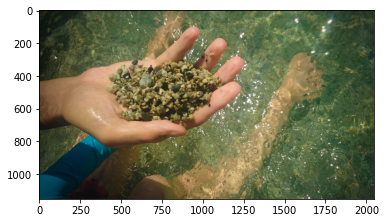

In [ ]:
# Lendo a imagem como um array
img =  mpimg.imread('praia.jpg')

# plotando a imagem
plt.imshow(img)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


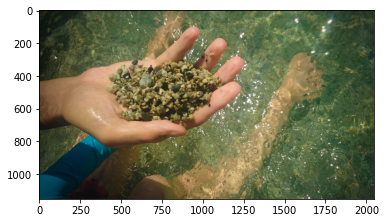

In [ ]:
#Para permitir integração com o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Lendo a imagem como um array (Forma alternativa com google drive)
img =  mpimg.imread('/content/drive/MyDrive/Imagens aula - Introdução à Visão Computacional/praia.jpg')

# plotando a imagem
plt.imshow(img)

Text(0.5, 1.0, 'Canal B')

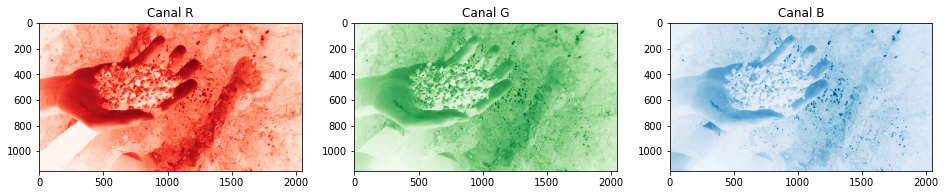

In [ ]:
#RGB
fig = plt.figure(figsize=(16, 8))
a = fig.add_subplot(2, 3, 1) # primeiro parâmetro representa a qtd de linhas na nossa figura, segundo parâmetro a qtd de colunas e o último parâmetro
#o posicionamento da nossa subimagem, normalmente é representado de forma crescente partindo do numero 1.
imgplot = plt.imshow(img[:,:,0],cmap="Reds")
a.set_title('Canal R')

b = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(img[:,:,1],cmap="Greens")
b.set_title('Canal G')

c = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(img[:,:,2],cmap="Blues")
c.set_title('Canal B')

Convertendo para tons de cinza

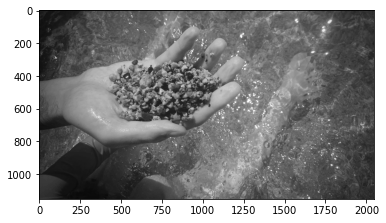

In [ ]:
from skimage.color import rgb2gray #2 = to => rgb to gray
img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')

Convertendo RGB para YIQ

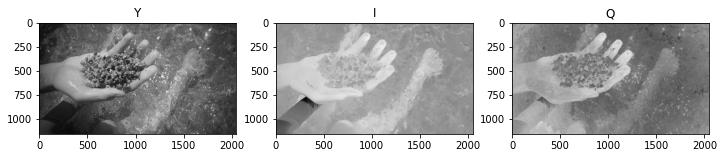

In [ ]:
from skimage.color import rgb2yiq
img_YIQ = rgb2yiq(img)

fig, ax = plt.subplots(1, 3, figsize=(12,4)) # qtd linhas, qtd colunas, define a resoluação da nossa figura
ax[0].imshow(img_YIQ[:,:,0], cmap='gray')
ax[0].set_title('Y')
ax[1].imshow(img_YIQ[:,:,1], cmap='gray')
ax[1].set_title('I')
ax[2].imshow(img_YIQ[:,:,2], cmap='gray')
ax[2].set_title('Q');

Convertendo RGB para HSV

(-0.5, 2047.5, 1151.5, -0.5)

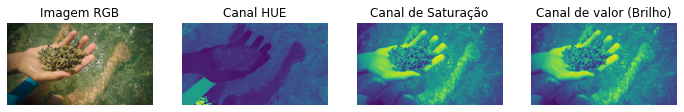

In [ ]:
from skimage.color import rgb2hsv

rgb_img = img
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
saturation_img = hsv_img[:,:,1]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(12, 4)) # default - padrão = 1 linha 

ax0.imshow(rgb_img)
ax0.set_title("Imagem RGB")
ax0.axis('off')
ax1.imshow(hue_img)
ax1.set_title("Canal HUE")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Canal de Saturação")
ax2.axis('off')
ax3.imshow(value_img)
ax3.set_title("Canal de valor (Brilho)")
ax3.axis('off')

#fig.tight_layout()

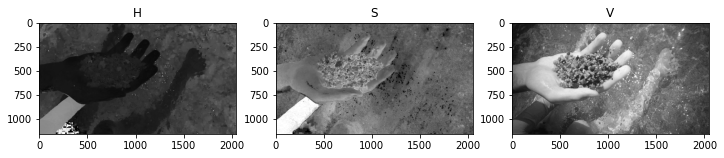

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(hsv_img[:,:,0], cmap='gray')
ax[0].set_title('H')
ax[1].imshow(hsv_img[:,:,1], cmap='gray')
ax[1].set_title('S')
ax[2].imshow(hsv_img[:,:,2], cmap='gray')
ax[2].set_title('V');

Text(0.5, 1.0, 'V')

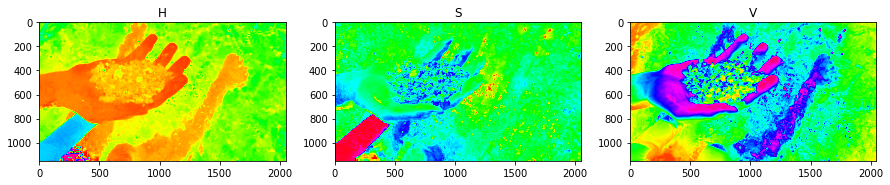

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv_img[:,:,0],cmap='hsv')
ax[0].set_title('H')
ax[1].imshow(hsv_img[:,:,1],cmap='hsv')
ax[1].set_title('S')
ax[2].imshow(hsv_img[:,:,2],cmap='hsv')
ax[2].set_title('V')

Convertendo RGB para LAB


Text(0.5, 1.0, 'B')

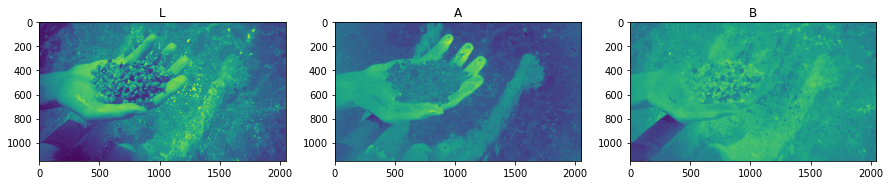

In [ ]:
from skimage.color import rgb2lab
img_lab = rgb2lab(img)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_lab[:,:,0])
ax[0].set_title('L')
ax[1].imshow(img_lab[:,:,1])
ax[1].set_title('A')
ax[2].imshow(img_lab[:,:,2])
ax[2].set_title('B')

2) Equalização de histograma


Text(0.5, 1.0, 'Histograma 2')

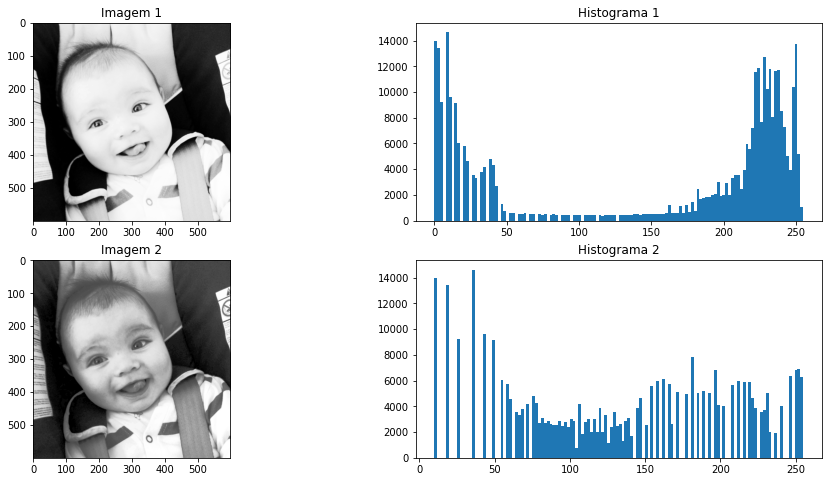

In [ ]:
img = array(Image.open('/content/drive/MyDrive/Imagens aula - Introdução à Visão Computacional/atividade1.png').convert('L'))
#Forma alternativa de leitura:
#img =  mpimg.imread('atividade1.png')

img_eq,cdf = imF.histeq(img)

fig = plt.figure(figsize=(16, 8))

a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img,cmap="gray")
a.set_title('Imagem 1')

b = fig.add_subplot(2, 2, 2)
hist(img.flatten(), 128)
b.set_title('Histograma 1')

a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(img_eq,cmap="gray")
a.set_title('Imagem Equalizada')

b = fig.add_subplot(2, 2, 4)
hist(img_eq.flatten(), 128)
b.set_title('Histograma 2')

3) Limiarização

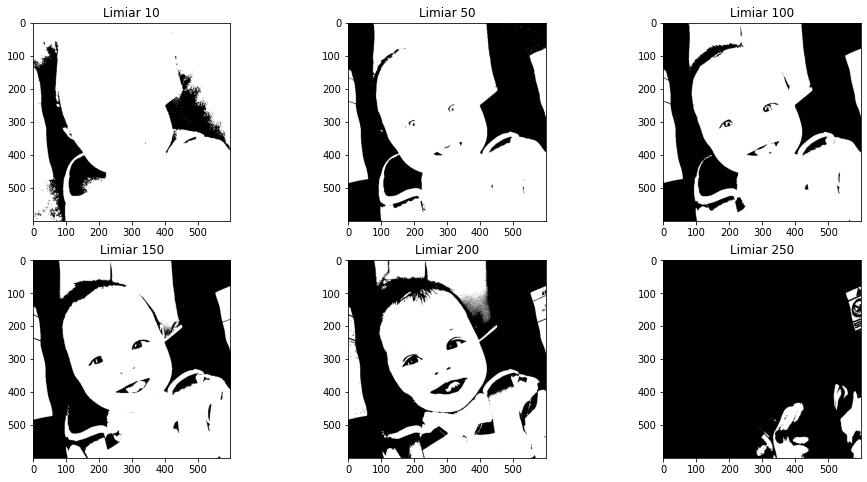

In [ ]:
#limiarizacao
img = array(Image.open('/content/drive/MyDrive/Imagens aula - Introdução à Visão Computacional/atividade1.png').convert('L'))
#Forma alternativa de leitura:
#img =  mpimg.imread('atividade1.png')

#varias resolucoes em histograma
fig = plt.figure(figsize=(16, 8))
aux = 1
for lim in [10,50,100,150,200,250]:
  a = fig.add_subplot(2, 3, aux)
  imgplot = plt.imshow(imF.limiarizacao(img,lim),cmap="gray")
  a.set_title('Limiar '+str(lim))
  aux = aux + 1

Definindo um limiar

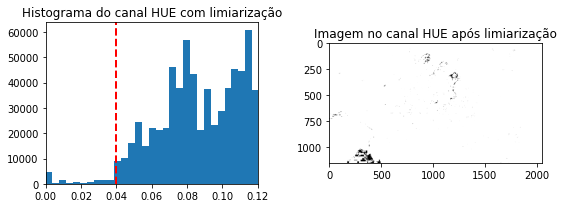

In [ ]:
hue_threshold = 0.04 #limiarização
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 256)
ax0.set_title("Histograma do canal HUE com limiarização")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
#ax1.imshow(binary_img)
ax1.imshow(binary_img, cmap='gray')
ax1.set_title("Imagem no canal HUE após limiarização")
ax1.axis('on')

fig.tight_layout()